# **Problem Statement**


A D2C startup develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with intent to buy product(s) are generally known as leads (Potential Customers). 


Leads are captured in 2 ways - Directly and Indirectly. 


Direct leads are captured via forms embedded in the website while indirect leads are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.


Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.


Now, as a data scientist, your task at hand is to predict the propensity to buy a product based on the user's past activities and user level information.

## 1. Loading Modules and Datasets


In [44]:
# Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
# Loading datasets

train = pd.read_csv("/content/drive/MyDrive/JOB-A-THON  June 2022/train_wn75k28.csv")
test = pd.read_csv("/content/drive/MyDrive/JOB-A-THON  June 2022/test_Wf7sxXF.csv")
sub = pd.read_csv("/content/drive/MyDrive/JOB-A-THON  June 2022/sample_submission_2zvVjBu.csv")

In [46]:
train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [47]:
test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [48]:
test_id = test.id

In [49]:
train.shape

(39161, 19)

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [51]:
train.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


## 2. Exploratory Data Analysis


In [52]:
train['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [53]:
print('Buy percentage :', train['buy'].value_counts()[1]/train['buy'].value_counts().sum()*100 , '%')

Buy percentage : 5.102014759582238 %


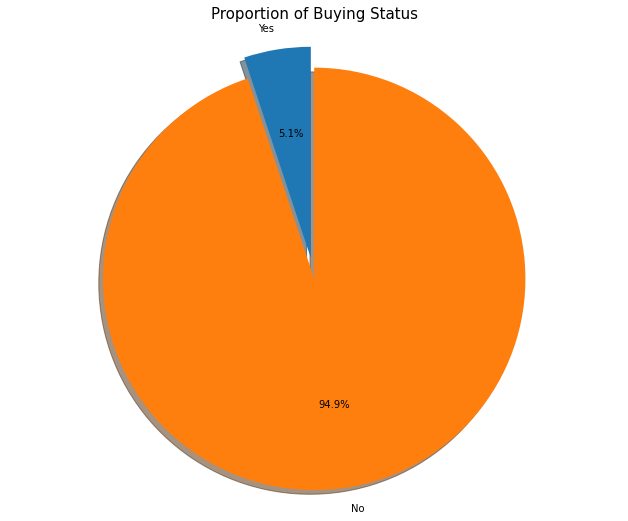

In [54]:
# Pie chart to display the amount (percentage) distribution of the Target Variable

labels = 'Yes', 'No'
sizes = [train.buy[train['buy']== 1].count(), train.buy[train['buy']== 0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(11, 9))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Buying Status", size = 15)
plt.show()

In [55]:
train.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy'],
      dtype='object')

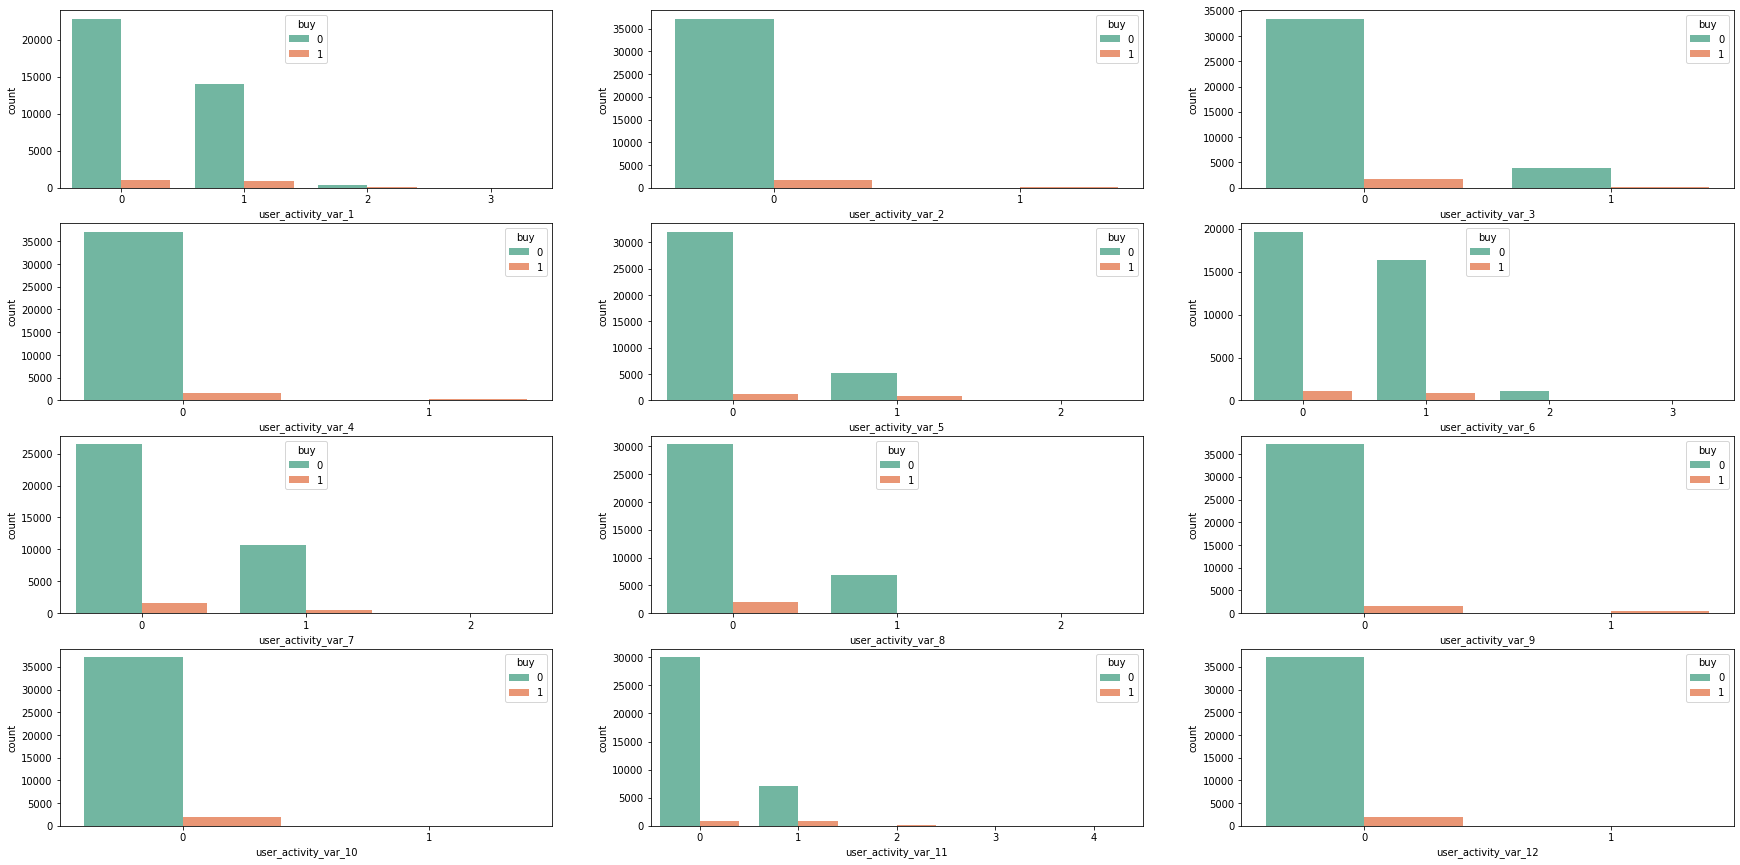

In [56]:
# Count column plots to map the dependence of 'Loan_Status' column on categorical features

fig, ax = plt.subplots(4, 3, figsize=(30, 15))

sns.countplot(x='user_activity_var_1', hue='buy', data=train, palette='Set2', ax=ax[0][0])
sns.countplot(x='user_activity_var_2', hue='buy', data=train, palette='Set2', ax=ax[0][1])
sns.countplot(x='user_activity_var_3', hue='buy', data=train, palette='Set2', ax=ax[0][2])
sns.countplot(x='user_activity_var_4', hue='buy', data=train, palette='Set2', ax=ax[1][0])
sns.countplot(x='user_activity_var_5', hue='buy', data=train, palette='Set2', ax=ax[1][1])
sns.countplot(x='user_activity_var_6', hue='buy', data=train, palette='Set2', ax=ax[1][2])
sns.countplot(x='user_activity_var_7', hue='buy', data=train, palette='Set2', ax=ax[2][0])
sns.countplot(x='user_activity_var_8', hue='buy', data=train, palette='Set2', ax=ax[2][1])
sns.countplot(x='user_activity_var_9', hue='buy', data=train, palette='Set2', ax=ax[2][2])
sns.countplot(x='user_activity_var_10', hue='buy', data=train, palette='Set2', ax=ax[3][0])
sns.countplot(x='user_activity_var_11', hue='buy', data=train, palette='Set2', ax=ax[3][1])
sns.countplot(x='user_activity_var_12', hue='buy', data=train, palette='Set2', ax=ax[3][2])

plt.show()

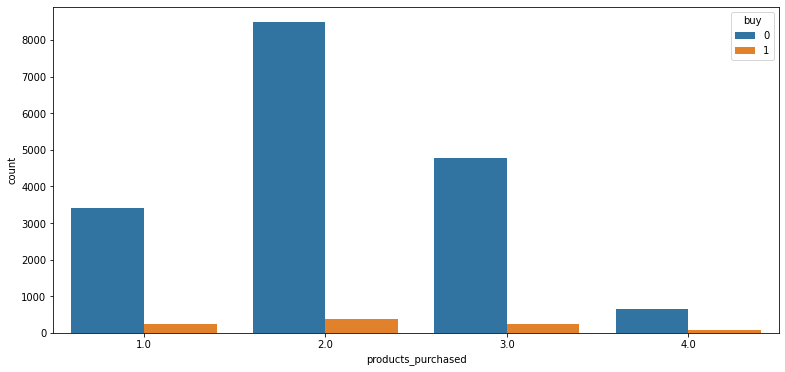

In [57]:
plt.figure(figsize=(13,6))
sns.countplot(x='products_purchased', hue='buy', data= train)

## 3. Pre-processing & Feature Engineering

In [58]:
target = train['buy'] # Get labels 
train.drop('buy', axis=1, inplace=True) # Remove labels

In [59]:
train.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
dtype: int64

In [60]:
train.drop(['id', 'created_at', 'signup_date'], axis = 1, inplace = True)
test.drop(['id', 'created_at', 'signup_date'], axis = 1, inplace = True)

print("Shape of train data:", train.shape)
print("Shape of test data:", test.shape)

Shape of train data: (39161, 15)
Shape of test data: (13184, 15)


In [61]:
train = train.fillna(0)
test = test.fillna(0)

In [62]:
train['buy'] = target

In [63]:
#train.drop('buy', axis = 1, inplace = True)

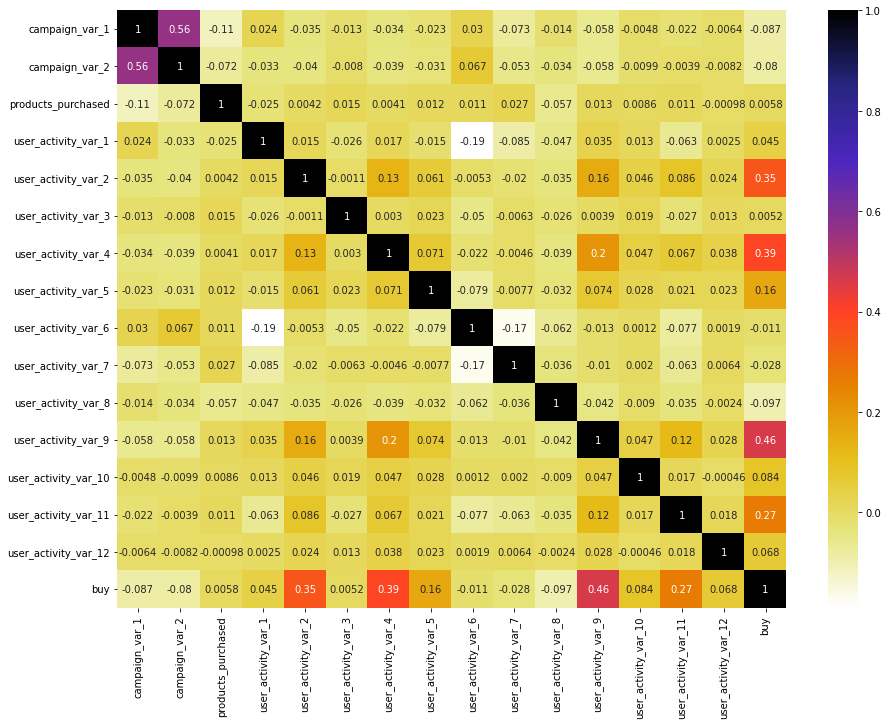

In [64]:
# Plot Correlation 
plt.subplots(figsize=(15, 11))
data = train.corr()
sns.heatmap(data, cmap =plt.cm.CMRmap_r, annot = True)

### **Feature Selection**

In [65]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


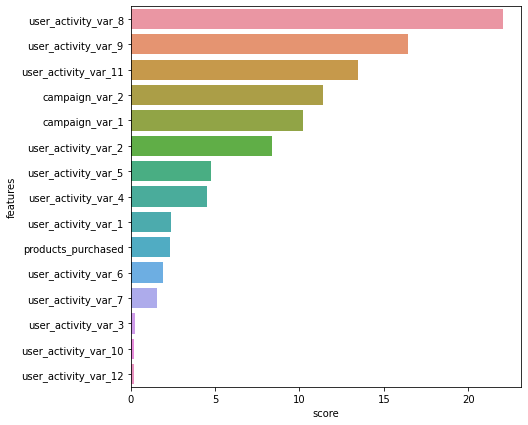

In [66]:
from catboost import CatBoostClassifier

X = train.drop('buy', axis=1)
Y = train.buy

cat = CatBoostClassifier(random_state=0, loss_function = 'Logloss', eval_metric='AUC', depth=3, logging_level='Silent')

cat.fit(X, Y)

cat_imp = pd.DataFrame()
cat_imp['features'] = cat.feature_names_ 
cat_imp['score'] = cat.feature_importances_

cat_imp = cat_imp.sort_values(by = 'score', ascending = False)

plt.rcParams['figure.figsize'] = (7, 7)
sns.barplot(y = 'features', x = 'score', data=cat_imp);

In [91]:
mask = cat_imp[cat_imp.score > 1].features.values
# mask = importance_df[importance_df.importance_mean > 0].feature.values
mask

array(['user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_11', 'campaign_var_2', 'campaign_var_1',
       'user_activity_var_2', 'user_activity_var_5',
       'user_activity_var_4', 'user_activity_var_1', 'products_purchased',
       'user_activity_var_6', 'user_activity_var_7'], dtype=object)

In [92]:
train_new = train.loc[:, mask]
train_new['buy'] = train.loc[:, 'buy']

test_new = test.loc[:, mask]

## 4. Model Building & Evaluation

In [93]:
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ROCAUC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# X = train_new.loc[:, train_new.columns != 'click']
# y = train_new.click

X = train_new.drop('buy', axis=1)
y = train_new.buy

# Create the train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =0, shuffle=True)

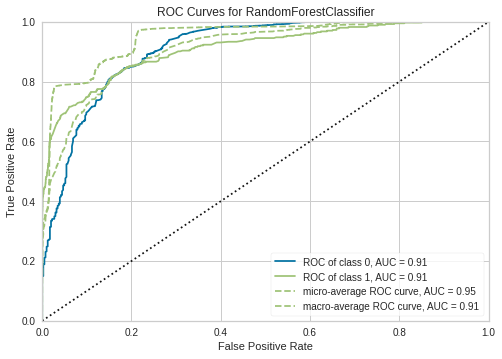

In [94]:
rf = RandomForestClassifier(random_state=0, max_depth = 5, n_estimators=100, 
                    class_weight = 'balanced')

visualizer = ROCAUC(rf)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()   

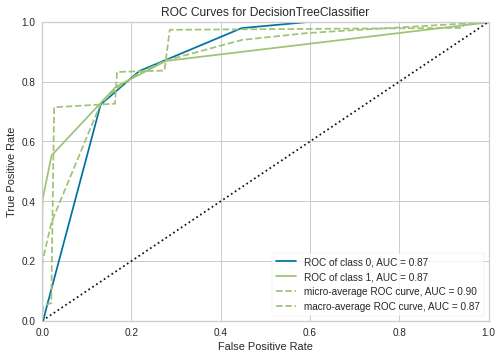

In [95]:
dt = DecisionTreeClassifier(random_state=0, max_depth = 5, class_weight = 'balanced')
visualizer = ROCAUC(dt)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

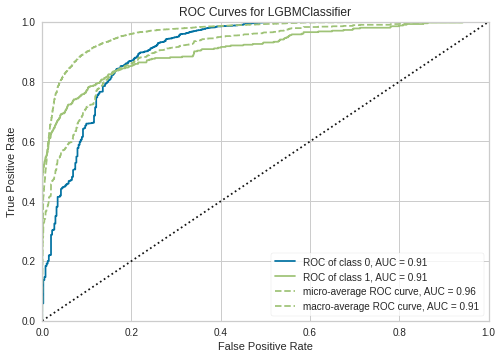

In [110]:
lgb = LGBMClassifier(random_state=0, objective='binary', learning_rate=.1, max_depth = 5, n_estimators=500, 
                    class_weight = 'balanced')

visualizer = ROCAUC(lgb)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()  

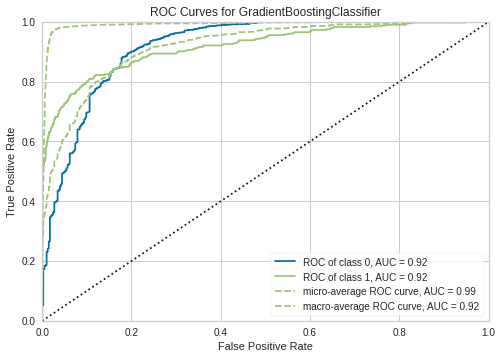

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.1, random_state=0, n_estimators=100, max_depth=5)

visualizer = ROCAUC(gbc)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

In [112]:
lgb.fit(x_train, y_train)

# Making Prediction
lgb_predict = lgb.predict(x_test)

In [113]:
lgb_f1_score = f1_score(y_test, lgb_predict)
lgb_f1_score

0.43951324266284897

In [100]:
gbc.fit(x_train, y_train)

# Making Prediction
gbc_predict = gbc.predict(x_test)

In [101]:
gbc_f1_score = f1_score(y_test, rf_predict)
gbc_f1_score

0.37322274881516593

In [120]:
model = CatBoostClassifier(random_state=300, learning_rate=.1, max_depth = 5, iterations=500)
#fitting the train data
model.fit(x_train, y_train)

0:	learn: 0.5438742	total: 18.5ms	remaining: 9.25s
1:	learn: 0.4257077	total: 34.7ms	remaining: 8.64s
2:	learn: 0.3411202	total: 48.8ms	remaining: 8.08s
3:	learn: 0.2774077	total: 67.4ms	remaining: 8.36s
4:	learn: 0.2349045	total: 88.2ms	remaining: 8.73s
5:	learn: 0.1997396	total: 105ms	remaining: 8.61s
6:	learn: 0.1756685	total: 118ms	remaining: 8.33s
7:	learn: 0.1584956	total: 137ms	remaining: 8.41s
8:	learn: 0.1432956	total: 157ms	remaining: 8.55s
9:	learn: 0.1332633	total: 171ms	remaining: 8.36s
10:	learn: 0.1279200	total: 182ms	remaining: 8.1s
11:	learn: 0.1227441	total: 187ms	remaining: 7.61s
12:	learn: 0.1180735	total: 195ms	remaining: 7.29s
13:	learn: 0.1142355	total: 200ms	remaining: 6.96s
14:	learn: 0.1110176	total: 207ms	remaining: 6.71s
15:	learn: 0.1090124	total: 217ms	remaining: 6.57s
16:	learn: 0.1067455	total: 224ms	remaining: 6.36s
17:	learn: 0.1057476	total: 230ms	remaining: 6.15s
18:	learn: 0.1042868	total: 237ms	remaining: 5.99s
19:	learn: 0.1032097	total: 244ms	rem

In [121]:
# Making Prediction
cat_predict = model.predict(x_test)

In [122]:
cat_f1_score = f1_score(y_test, cat_predict)
cat_f1_score

0.6719999999999999

### **STACKED MODEL**

In [86]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

combined_model = [('LGB', lgb), ('Random Forest', rf), ('Decision Tree', dt), ('GB', gbc)]

v =  VotingClassifier(estimators = combined_model, voting = 'soft')
v.fit(x_train, y_train)

sig_clf = CalibratedClassifierCV(v, method="sigmoid")

sig_clf.fit(x_train, y_train)

clf = sig_clf.predict(x_test)

from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,clf)
print(score)

0.7590802568858573


In [87]:
clf

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
f1_score(y_test,clf)

0.6624803767660911

In [123]:
test_buy = model.predict(test_new)

#buys = test_buy[:, 1]

In [116]:
sub = pd.DataFrame()
sub['id'] = test_id
sub['buy'] =  buys

In [115]:
sub.to_csv('/content/drive/MyDrive/JOB-A-THON  June 2022/lgb_submission.csv', index=False)

In [124]:
submission = pd.DataFrame({'id': test_id, 'buy': test_buy})

In [90]:
submission.to_csv('/content/drive/MyDrive/JOB-A-THON  June 2022/stacked_model_submission.csv', index=False)

In [125]:
submission.to_csv('/content/drive/MyDrive/JOB-A-THON  June 2022/cat_model_submission.csv', index=False)